# Проект

### Описание проекта

Контекст

Для крупного интернет-магазина совместно отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизация гипотез.

В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задачи:

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
data_hipotes = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data_hipotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [5]:
data_hipotes

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
#Применим фреймворк ICE для приоритизации гипотез
data_hipotes['ICE']=data_hipotes['Impact']*data_hipotes['Confidence']/data_hipotes['Efforts']
data_hipotes[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


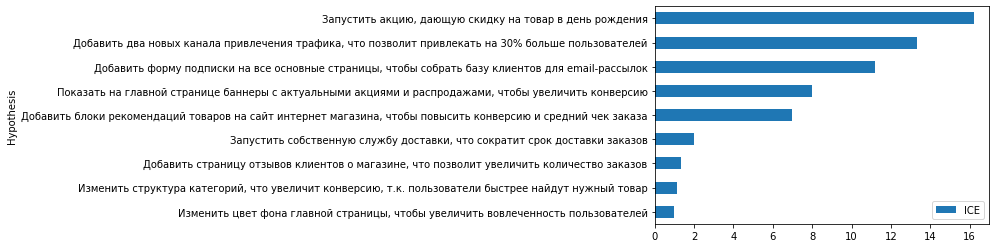

In [7]:
ax= data_hipotes[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
plt.show()

Наиболее перспективные гипотезы по ICE 
- Запустить акцию, дающую скидку на товар в день рождения	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [8]:
data_hipotes['RICE']=data_hipotes['Reach']*data_hipotes['Impact']*data_hipotes['Confidence']/data_hipotes['Efforts']
data_hipotes[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


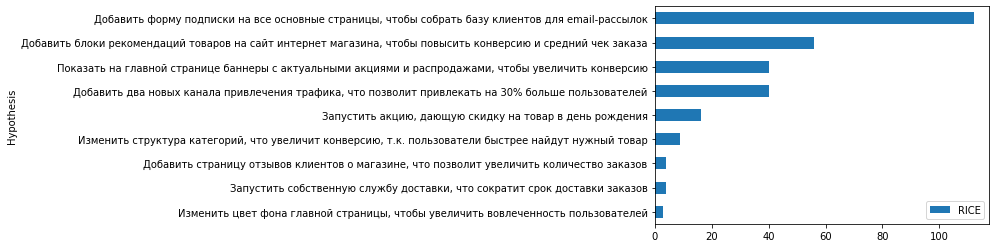

In [9]:
ax= data_hipotes[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
plt.show()

И вновь наиболее перспективные гипотезы по RICE 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
а также
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Однако у первой и последней гипотез параметр Reach равны 10 и 8 соответственно в то время как у других он гораздо меньше- это и повлияло на конечный вывод

###  как изменилась приоритизация гипотез при применении RICE вместо ICE

Главное отличие ICE «влияние, уверенность / простота» от RICE в том что он не учитывает скольких пользователей затронет изменение, высокий параметр Reach вносит заметное влияние на результат, именно поэтому есть отличия в приоритизациях. 

# Часть 2. Анализ A/B-теста

In [10]:
orders=pd.read_csv('/datasets/orders.csv')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


orders таблица:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

В таблице заказов 5 столбцов, данные полные

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors=pd.read_csv('/datasets/visitors.csv')

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


таблица visitors

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

В таблице визитов 3 столбца, данные полные

In [17]:
visitors.duplicated().sum()

0

### Построим график кумулятивной выручки по группам

In [18]:
orders['date'] =pd.to_datetime(orders['date'])


In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [21]:
#Вычислим максимальную дату, для группы тоже рассчитаем максимум,Найдём число уникальных ID заказов и пользователей
#получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique,\
                                           'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [22]:
#Создаем таблицу с накопленными числом посетителей на каждую дату и группу
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                          visitors['group'] == x['group'])]\
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [23]:
#Объединим эти данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]



In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]



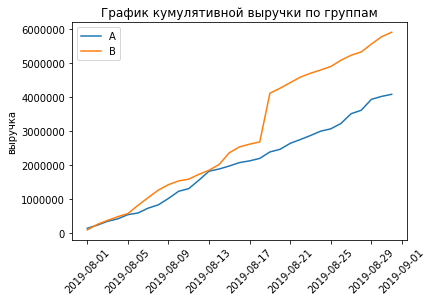

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('выручка')
plt.xticks(rotation=45)
plt.legend();
plt.show()

До определенного момента выручка почти равномерно увеличивается, но после определленого всплеска группа А стабильно отстает от группы В. Вероятно это всплеск числа заказов, либо появились очень дорогие заказы в нашей выборке

### Построим график кумулятивного среднего чека по группам

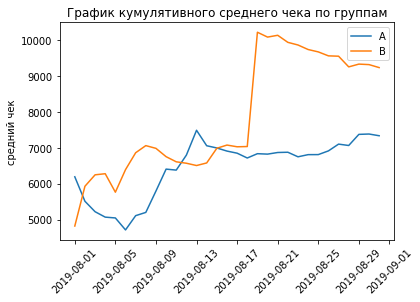

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('средний чек')
plt.xticks(rotation=45)
plt.legend();
plt.show()

Средний чек неравномерный и ближе к концу теста: для группы В стал падать и равномерно идти для группы А. Если смотреть по предыдущему графику-в том же месте резкий скачок,что говорит в группу В  попали крупные заказы.
Тогда нужно больше данных, чтобы прийти к реальному среднему чеку и понять его дальнейшее поведение.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])


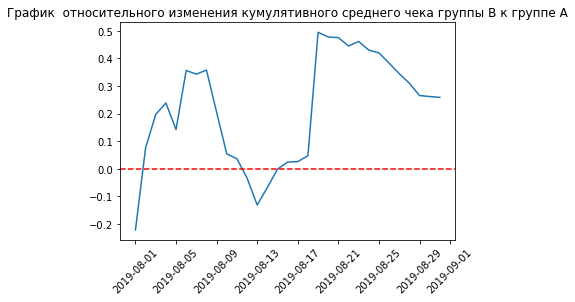

In [29]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График  относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--');
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Это крупные заказы!

### Построим график кумулятивной конверсии по группам

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [31]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

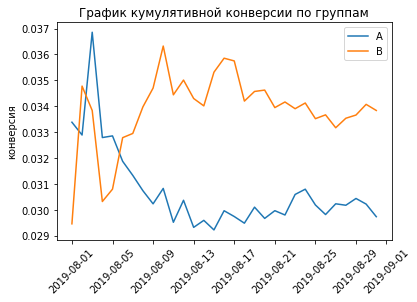

In [32]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.ylabel('конверсия')
plt.xticks(rotation=45)
plt.legend();
plt.show()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

По графику видно что  группы колебались, но 8 дня теста конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [33]:
#Объединим датафеймы кумулятивной конверсии
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

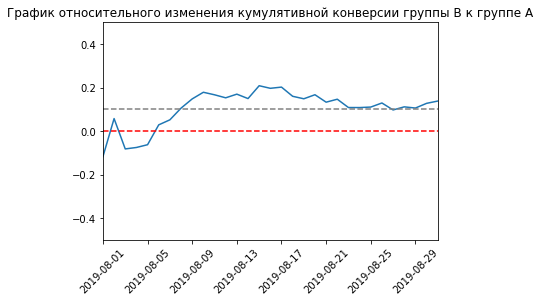

In [34]:

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.xticks(rotation=45)
plt.show()

Группа В лидирует по конверсии и колеблется в районе 10-15% относительно группы А

### Построим точечный график количества заказов по пользователям

In [35]:
#Посчитаем колличество заказов по каждому пользователю
ordersByUsers = orders.drop(['revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
                .agg({'transactionId' : pd.Series.nunique, 'group':'max'})
ordersByUsers.columns = ['userId','orders', 'group']
ordersByUsers.sort_values(by='orders',ascending=False)

,userId,orders,group
1023,4256040402,11,B
591,2458001652,11,B
569,2378935119,9,B
487,2038680547,8,B
44,199603092,5,B
...,...,...,...
359,1484903144,1,A
360,1485964287,1,A
361,1494664757,1,B
362,1495112755,1,A


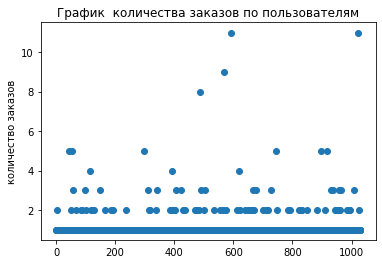

In [37]:
#строим график
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('График  количества заказов по пользователям')
plt.ylabel('количество заказов')

plt.show();

Покупателей совершивших более 2 заказов мало

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [39]:
ordersByUsers['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Пользователей совершивших более 2 заказов не более 5%, и не более 1 % сделали 4 и больше заказов это и есть аномалия

### Построим точечный график стоимостей заказов

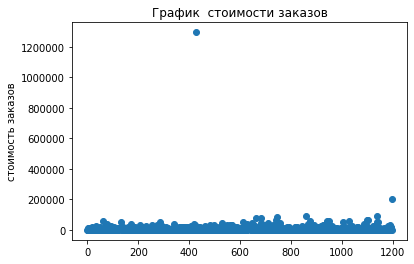

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('График  стоимости заказов')
plt.ylabel('стоимость заказов')
plt.show();

Вероятнее всего это и есть тот самый выброс который привел к скачку на графиках выше

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [43]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

не более чем у 5% заказов чек дороже 28000, и не больше чем у 1% дороже 58233- все что выше этой цифры будет аномалией

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [44]:
#делим покупателей по группам
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
                 .agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [45]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [46]:
# колличество заказов и сумма по дням для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'transactionId', 'revenuePerDateA']
ordersADaily

,date,transactionId,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218
5,2019-08-06,18,48484
6,2019-08-07,18,142417
7,2019-08-08,16,96279
8,2019-08-09,16,188506
9,2019-08-10,16,210495


In [47]:
# колличество заказов и сумма по дням для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'transactionId', 'revenuePerDateB']
ordersBDaily

,date,transactionId,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428
5,2019-08-06,28,242342
6,2019-08-07,24,225334
7,2019-08-08,27,220918
8,2019-08-09,25,160812
9,2019-08-10,23,107802


In [51]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA'] 

In [52]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] 

In [53]:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum()\
                                                  - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [54]:
sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum()\
                                                  - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [55]:
result=stats.mannwhitneyu(sampleA, sampleB)

##### Проверим нулевую гипотезу о том, что статистически значимых различий по "сырым" данным в конверсии между группами нет

In [56]:
alpha=.05

In [57]:
print("По «сырым» данным различий в конверсии групп A и B нет")
print("p-значение: {0:.3f}". format(result[1]))

if (result[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

По «сырым» данным различий в конверсии групп A и B нет
p-значение: 0.008
Отвергаем нулевую гипотезу


число — p-value = 0.008 меньше значения 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем

In [58]:
print("относительный прирост конверсии группы B:", \
      format(sampleB.mean()/sampleA.mean()-1))

относительный прирост конверсии группы B: 0.13807884655320146


относительный проигрыш группы А равен 14% 

In [59]:
conversion=orders.groupby('group').agg({'transactionId':'count'})\
           .rename(columns={'transactionId':'orders'})\
           .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion']=conversion['orders']/conversion['visitors']
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


Конверсия группы В больше конверсии группы А на 14%, статистическая значимость есть

Статистическая значимость достигнута, сегмент В лучше сегмента А

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [62]:
ordersA=orders[orders['group'] == 'A']['revenue']
ordersB=orders[orders['group'] == 'B']['revenue']

In [63]:
result=stats.mannwhitneyu(ordersA, ordersB)

##### Проверим нулевую гипотезу о том, что статистически значимых различий по "сырым" данным в  среднем чеке заказа между группами нет.¶

In [64]:
print("ГИПОТЕЗА-По «сырым» данным нет различий в среднем чеке заказа между группами A и В")
print('p-значение:', format(result[1]))

if (result[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

ГИПОТЕЗА-По «сырым» данным нет различий в среднем чеке заказа между группами A и В
p-значение: 0.3646454927716229
Не получилось отвергнуть нулевую гипотезу


In [65]:
print("относительные различия в среднем чеке между группами", \
      format((ordersB.mean()/ordersA.mean())-1))

относительные различия в среднем чеке между группами 0.2587136699126005


 средний чек группы B значительно выше среднего чека группы A на 25%. однако статистически значимых отличий между группами нет!

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

 Найденные выше 95-й и 99-й перцентили средних чеков равны 28000 , 58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами.

In [66]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

In [67]:
#срез пользователей, совершивших заказы дороже 30000
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [68]:
# объединим их в таблице и уберем дубликаты
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)\
                .drop_duplicates().sort_values()
abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
940     4003628586
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, Length: 68, dtype: int64

In [69]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum()\
                                                    - len(ordersByUsersA['orders'])),name='orders')],axis=0)


In [70]:
# сохраним очищенные данные о заказах — не включая аномальных пользователей
sampleBFiltered =  pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum()\
                                                    - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [71]:
result=stats.mannwhitneyu(sampleAFiltered,sampleBFiltered)

##### Проверяем нулевую гипотезу- различий в конверсии между группами по «очищенным» данным¶ нет:

In [72]:
print("ГИПОТЕЗА-По «очищенным» данным различий в конверсии в среднем чеке заказа между группами A и В нет")
print('p-значение:', format(result[1]))

if (result[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

ГИПОТЕЗА-По «очищенным» данным различий в конверсии в среднем чеке заказа между группами A и В нет
p-значение: 0.006671296868564326
Отвергаем нулевую гипотезу


In [73]:
print("Oтносительный прирост конверсии очищенной группы B к группе А равен", \
      format((sampleBFiltered.mean()/sampleAFiltered.mean())-1))

Oтносительный прирост конверсии очищенной группы B к группе А равен 0.17155456396208346


Как и в случае с сырыми данными статистическая значимость достигнута. Сегмент В значительно лучше сегмента А

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [74]:
print("p-значение:{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))


p-значение:0.360


Проверяем нулевую гипотезу- Средний чек группы А равен среднему чеку группы В

In [75]:
if (stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [76]:
print("Относительное различие среднего чека {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Относительное различие среднего чека -0.023


Статистически значимые отличия между группами отсутствуют, разница в среднем чеке лишь 3 %

# ВЫВОД

Какие выводы по тесту можем сделать:
Как и в случае с сырыми данными так и после фильтрации статистическая значимость достигнута. Сегмент В значительно лучше сегмента А;
Разница в среднем чеке по сырым данным составляет 25%, после фильтрации лишь 3%;
График различия конверсии между группами показывает, что результаты группы B лучше группы A ,но нет тенденции к стабильности
График различия среднего чека говорит о том, что результаты группы B лучше, однако есть тенденция к падению, ситуация у группы А более стабильна, ее средний чек немного растет.
Исходя из обнаруженных фактов, тест следует продолжить. признать его успешным или нет не представляется возможным. Продолжать нужно до тех пор пока графики не придут к стабильности, при имеющихся данных сегмент B  лучше сегмента A.

Исходя из проведенного анализа ключевые показатели определены, тест запущен и мы получили первые данные. В данный момент, возникает соблазн сделать поспешные выводы о результатах тестирования и признать победу за группой В, однако, значения наших ключевых показателей меняются день ото дня-увеличение среднего чека группы А и падение этого показателя у группы В — это значит для сравнения наших величин требуется некоторое время, чтобы накопить историю. На сегодняшний день сложно сказать насколько мы уверены в достоверности полученного результата и абсолютно нет уверенности что если мы еще раз проведем тест, какова вероятность того, что мы сможем повторить результат.  Нулевые гипотезы по "сырым"данным , что о том, что статистически значимых различий в конверсии между группами нет и  нет различий в среднем чеке заказа отвергнуты, также как и  ГИПОТЕЗА различий в конверсии в среднем чеке заказа между группами A и В , однако гипотезу- Средний чек группы А равен среднему чеку группы В
не удалось опровергнуть. 
Исходя из вышеперечисленного останавливать тест рано, его нужно продолжить если есть финансовая возможность.